In [231]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
from sklearn import preprocessing

In [232]:
# Loading the MNIST datasets - 60000 images for training and 10000 images for testing
(imageTrainRaw, labelTrainRaw), (imageTestRaw, labelTestRaw) = tf.keras.datasets.mnist.load_data()

# Splitting the training set into 2: 55000 images for training and 5000 images for validation
imageTestRaw = imageTestRaw[:]
labelTestRaw = labelTestRaw[:]
imageValidRaw = imageTrainRaw[55000:]
labelValidRaw = labelTrainRaw[55000:]
imageTrainRaw = imageTrainRaw[:55000]
labelTrainRaw = labelTrainRaw[:55000]


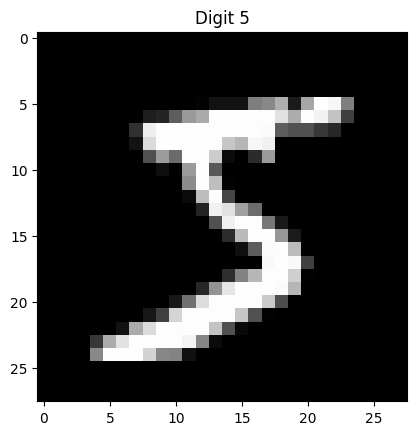

In [233]:
# Plotting an image
def plotImage(idx):
    pyplot.title(f"Digit {labelTrainRaw[idx]}")
    pyplot.imshow(imageTrainRaw[idx], cmap='gray')
    pyplot.savefig("./test/digitGrey.jpg")
    
plotImage(idx = 0)

In [234]:
# Preprocessing data (normalizing image arrays and 1-hot encoding label arrays)
imageTest = np.reshape(imageTestRaw, (10000, 784))
imageTest = preprocessing.normalize(imageTest, norm = "max")
imageTest = imageTest.T
labelTest = tf.keras.utils.to_categorical(labelTestRaw, num_classes=10)
labelTest = labelTest.T 

imageValid = np.reshape(imageValidRaw, (5000, 784))
imageValid = preprocessing.normalize(imageValid, norm = "max")
imageValid = imageValid.T
labelValid = tf.keras.utils.to_categorical(labelValidRaw, num_classes=10)
labelValid = labelValid.T

imageTrain = np.reshape(imageTrainRaw, (55000, 784))
imageTrain = preprocessing.normalize(imageTrain, norm="max")
labelTrain = tf.keras.utils.to_categorical(labelTrainRaw, num_classes=10)

In [235]:
# Setting up the neural network layer dimension and hypermeters 
iter = 10000   # Number of iterations
size = 55000   # Batch size
etaInit = 0.1  # Initial learning rate
etaDecay = 1   # Learning rate decay
dInput = 784   # Input layer (28x28 pixels)
dHidden = 196  # Hidden layer (16x16 pixel)
dOutput = 10   # Output layer (0-9 digits)

In [241]:
# ReLU activation for hidden layer
def relu(x):
    return np.maximum(0, x)

# Softmax activation for output layer
def softmax(x):
    x -= max(x)
    e = np.exp(x)
    return e / sum(e)

# Calculating loss value using cross entropy
def floss(yCal, yLabel):
    result = sum(np.log(yCal)[idx] * yLabel[idx] for idx in range(10))
    return result

In [244]:
# Initializing weights, biases and eta
w1 = np.random.rand(dInput, dHidden)
b1 = np.random.rand(dHidden, 1)
w2 = np.random.rand(dHidden, dOutput)
b2 = np.random.rand(dOutput, 1)
eta = etaInit

for n in range(3):
    # Feed forward
    idx = np.random.randint(0, size)
    x = imageTrain[idx].reshape(784, 1)
    z1 = np.dot(w1.T, x) + b1
    a1 = relu(z1)
    z2 = np.dot(w2.T, a1) + b2
    a2 = softmax(z2)
    
    yCal = a2 
    yLabel = labelTrain[idx].reshape(10, 1)
    loss = floss(yCal, yLabel) 
        
    # Back propagation
    e2 = (yCal - yLabel)     # gradient of softmax using cross entropy
    dw2 = np.dot(a1, e2.T)
    db2 = e2
    e1 = np.dot(w2, e2)
    e1[z1 <= 0] = 0        # gradient of ReLU
    dw1 = np.dot(x, e1.T)
    db1 = e1

    # Updating weights and biases
    w1 = w1 - eta * dw1
    b1 = b1 - eta * db1
    w2 = w2 - eta * dw2
    b2 = b2 - eta * db2
    
    eta = etaInit / (1 + etaDecay * n)
    
    if(n % 1000 == 0):
        print(f"[Iter {n}] Loss: {loss}")

[Iter 0] Loss: [nan]


C:\Users\TheNM\AppData\Local\Temp\ipykernel_10580\2109645622.py:13: RuntimeWarning: divide by zero encountered in log
  result = sum(np.log(yCal)[idx] * yLabel[idx] for idx in range(10))
C:\Users\TheNM\AppData\Local\Temp\ipykernel_10580\2109645622.py:13: RuntimeWarning: invalid value encountered in multiply
  result = sum(np.log(yCal)[idx] * yLabel[idx] for idx in range(10))
